In [1]:
! pip install lineapy

  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Attempting uninstall: mistune
    Found existing installation: mistune 3.0.2
    Uninstalling mistune-3.0.2:
      Successfully uninstalled mistune-3.0.2
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.16.2
    Uninstalling nbconvert-7.16.2:
      Successfully uninstalled nbconvert-7.16.2


You should consider upgrading via the 'c:\users\abdulkarem\pycode\course-ds-base\.venv.ds-course-base\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
! python -m pip install --user pandas==1.3.2

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [8]:
%load_ext lineapy

c:\Users\Abdulkarem\pycode\course-ds-base\.venv.ds-course-base\lib\site-packages\pydantic\_internal\_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'orm_mode' has been renamed to 'from_attributes'
  warnings.warn(message, UserWarning)


PydanticUserError: Field 'node_type' defined on a base class was overridden by a non-annotated attribute. All field definitions, including overrides, require a type annotation.

For further information visit https://errors.pydantic.dev/2.6/u/model-field-overridden

In [4]:
lineapy.options

NameError: name 'lineapy' is not defined

In [5]:
import lineapy
import joblib
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

PydanticUserError: Field 'node_type' defined on a base class was overridden by a non-annotated attribute. All field definitions, including overrides, require a type annotation.

For further information visit https://errors.pydantic.dev/2.6/u/model-field-overridden

# Load dataset


In [1]:
# Get data

import pandas as pd
from sklearn.datasets import load_iris

data: sklearn.utils._bunch.Bunch = load_iris(as_frame=True)
print(type(data))
dataset = data.frame
dataset.head()

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# print labels for target values

[
    print(f"{target}: {label}")
    for target, label in zip(data.target.unique(), data.target_names)
]

0: setosa
1: versicolor
2: virginica


[None, None, None]

In [ ]:
# feature names

dataset.columns = [
    colname.strip(" (cm)").replace(" ", "_") for colname in dataset.columns.tolist()
]

feature_names = dataset.columns.tolist()[:4]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
# save raw data as artifact
dataset_csv = "./data/raw/iris.csv"
dataset.to_csv(dataset_csv, index=False)

In [ ]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
print(pd.__version__)

1.3.2


In [ ]:
# save raw data as artifact to lineapy
lineapy.save(dataset, "iris-raw")

LineaArtifact(name='iris-raw', _version=4)

# Features engineering


In [ ]:
dataset["sepal_length_to_sepal_width"] = (
    dataset["sepal_length"] / dataset["sepal_width"]
)
dataset["petal_length_to_petal_width"] = (
    dataset["petal_length"] / dataset["petal_width"]
)



dataset = dataset[
    [
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",

        #     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
        "sepal_length_to_sepal_width",
        "petal_length_to_petal_width",
        "target",
    ]
]

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,target
0,5.1,3.5,1.4,0.2,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,1.388889,7.0,0


In [ ]:
# Save features
features_path = "./data/processed/featured_iris.csv"
dataset.to_csv(features_path, index=False)

In [ ]:
# save features to lineapy
lineapy.save(dataset, "iris-preprocessed")

LineaArtifact(name='iris-preprocessed', _version=4)

# Split dataset


In [ ]:
test_size = 0.2

## Splittail train/test


In [ ]:
train_dataset, test_dataset = train_test_split(
    dataset, test_size=test_size, random_state=42
)



train_dataset.shape, test_dataset.shape

((120, 7), (30, 7))

In [ ]:
# Save train and test sets
trainset_path = "./data/processed/train_iris.csv"
testset_path = "./data/processed/test_iris.csv"

train_dataset.to_csv(trainset_path)
test_dataset.to_csv(testset_path)

In [ ]:
# save train and test sets to lineapy
lineapy.save(train_dataset, "train-dataset")
lineapy.save(test_dataset, "test-dataset")

LineaArtifact(name='test-dataset', _version=4)

# Train


In [ ]:
# Get X and Y

y_train = train_dataset.loc[:, "target"].values.astype("int32")
X_train = train_dataset.drop("target", axis=1).values.astype("float32")

In [ ]:
# Create an instance of Logistic Regression Classifier CV and fit the data

logreg = LogisticRegression(
    C=0.001, solver="lbfgs", multi_class="multinomial", max_iter=100
)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='multinomial')

In [ ]:
model_path = "./models/model.joblib"
joblib.dump(logreg, model_path)

['./models/model.joblib']

In [ ]:
# save model to lineapy
lineapy.save(model_path, "logreg-model")

LineaArtifact(name='logreg-model', _version=3)

# Evaluate


In [ ]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )

    return plt.gcf()

In [ ]:
# Get X and Y

y_test = test_dataset.loc[:, "target"].values.astype("int32")
X_test = test_dataset.drop("target", axis=1).values.astype("float32")

In [ ]:
prediction = logreg.predict(X_test)
cm = confusion_matrix(prediction, y_test)
f1 = f1_score(y_true=y_test, y_pred=prediction, average="macro")

In [ ]:
# f1 score value
f1

0.9305555555555555

In [ ]:
# Save metrics
metrics_file = "./reports/metrics.json"

metrics = {"f1": f1}

with open(metrics_file, "w") as mf:
    json.dump(obj=metrics, fp=mf, indent=4)

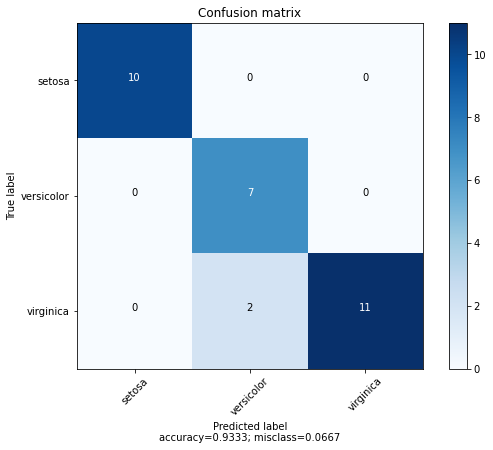

In [ ]:
cm_plot = plot_confusion_matrix(cm, data.target_names, normalize=False)

In [ ]:
# Save confusion matrix image
confusion_matrix_image = "./reports/confusion_matrix.png"
cm_plot.savefig(confusion_matrix_image)

In [ ]:
# save confusion matrix to lineapy
lineapy.save(plot_confusion_matrix, "plot-confusion-matrix")

LineaArtifact(name='plot-confusion-matrix', _version=1)

In [ ]:
# commenting for change